In [156]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [16,9]

In [157]:
import warnings
warnings.filterwarnings('ignore')

In [158]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\SampleSuperstore.csv")
storestyle = df.head(21)
storestyle.style.background_gradient(cmap = 'RdBu')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960000,2,0.000000,41.913600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940000,3,0.000000,219.582000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620000,2,0.000000,6.871400
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.577500,5,0.450000,-383.031000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368000,2,0.200000,2.516400
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860000,7,0.000000,14.169400
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280000,4,0.000000,1.965600
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152000,6,0.200000,90.715200
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504000,3,0.200000,5.782500
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900000,5,0.000000,34.470000


In [159]:
df.head() #first 5 values

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [160]:
df.tail() #last 5 values

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [161]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [162]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [163]:
df.shape

(9994, 13)

In [164]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [165]:
df.duplicated().sum()

17

In [166]:
df.describe().style.background_gradient(cmap = 'PuBu_r')

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [167]:
# Checking for null cells
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [168]:
df.notnull().sum()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [170]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [171]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.duplicated().sum()

0

<AxesSubplot:>

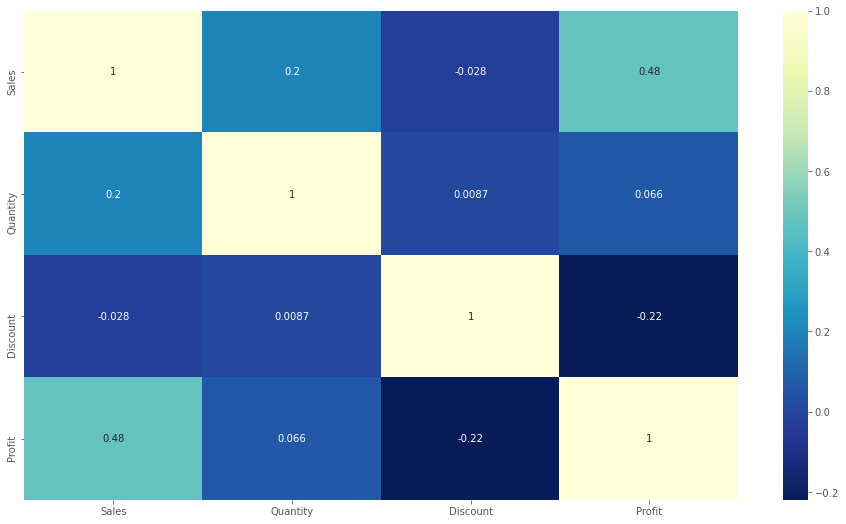

In [205]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='YlGnBu_r')

In [173]:
#dropping postal code columns
df = df.drop(['Postal Code'], axis = 1)

In [180]:
#valuecounts for segment
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

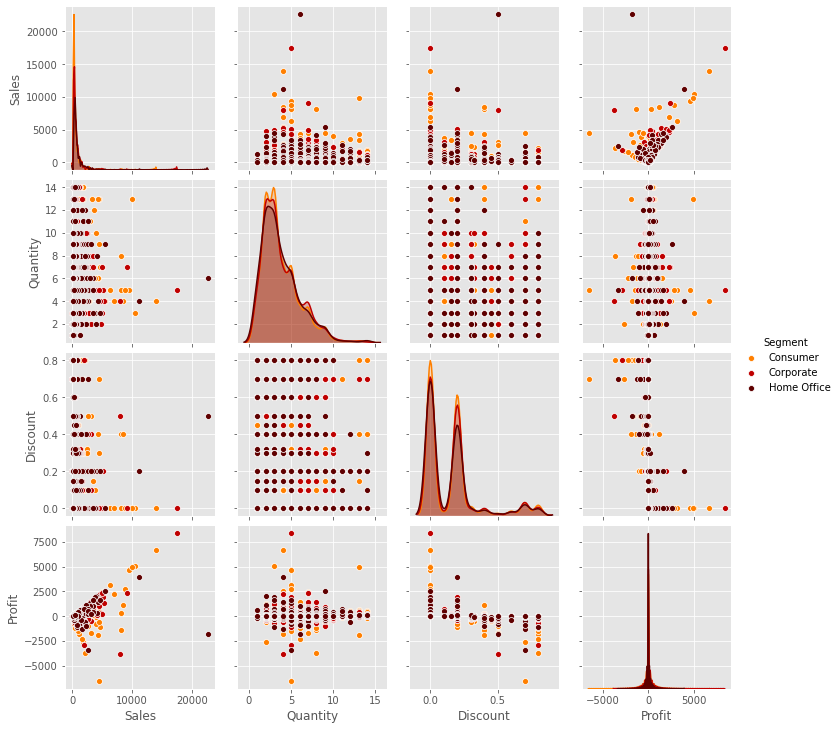

In [181]:
sns.pairplot(df, hue = 'Segment', palette = 'gist_heat_r')

In [182]:
df_con = df[df["Segment"] == "Consumer"]
df_corp = df[df["Segment"] == "Corporate"]
df_home = df[df["Segment"] == "Home Office"]

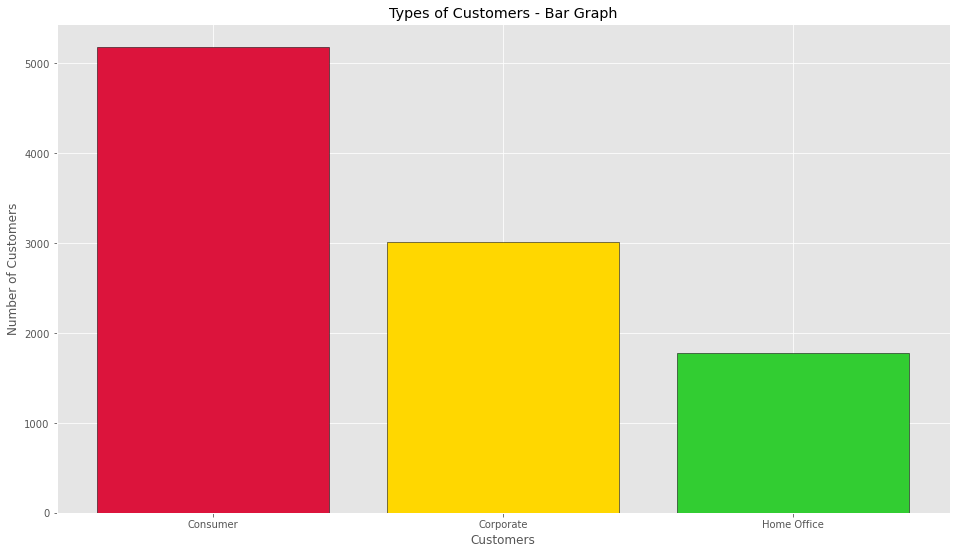

In [183]:
x = ["Consumer", "Corporate", "Home Office"]
y = [len(df_con.index), len(df_corp.index), len(df_home.index)]
plt.bar(x, y, color = ["crimson", "gold", "limegreen"], edgecolor = "black")
plt.title("Types of Customers - Bar Graph")
plt.xlabel("Customers")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

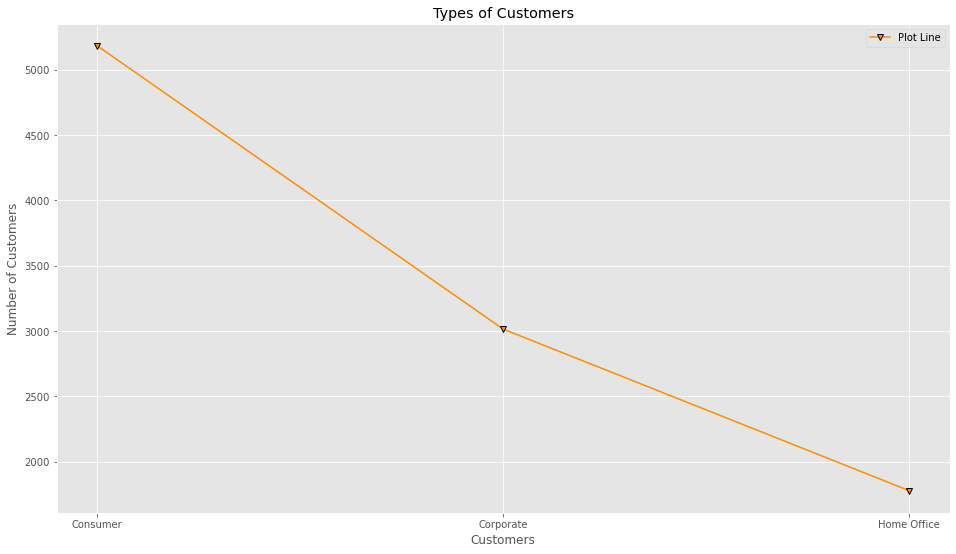

In [184]:
plt.plot(x, y, label = "Plot Line", color = "darkorange", markeredgecolor = "black", marker = "v")
plt.title("Types of Customers")
plt.xlabel("Customers")
plt.ylabel("Number of Customers")
plt.legend()
plt.grid(True)
plt.show()

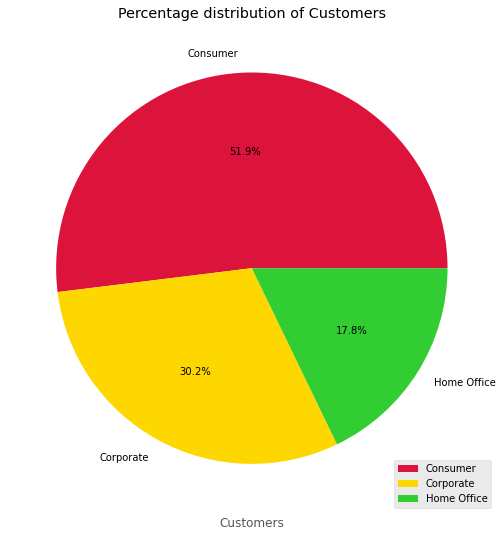

In [185]:
plt.pie(y, labels = x, colors = ["crimson", "gold", "limegreen"],autopct="%1.1f%%")
plt.title("Percentage distribution of Customers")
plt.xlabel("Customers")
plt.legend()
plt.grid(True)
plt.show()

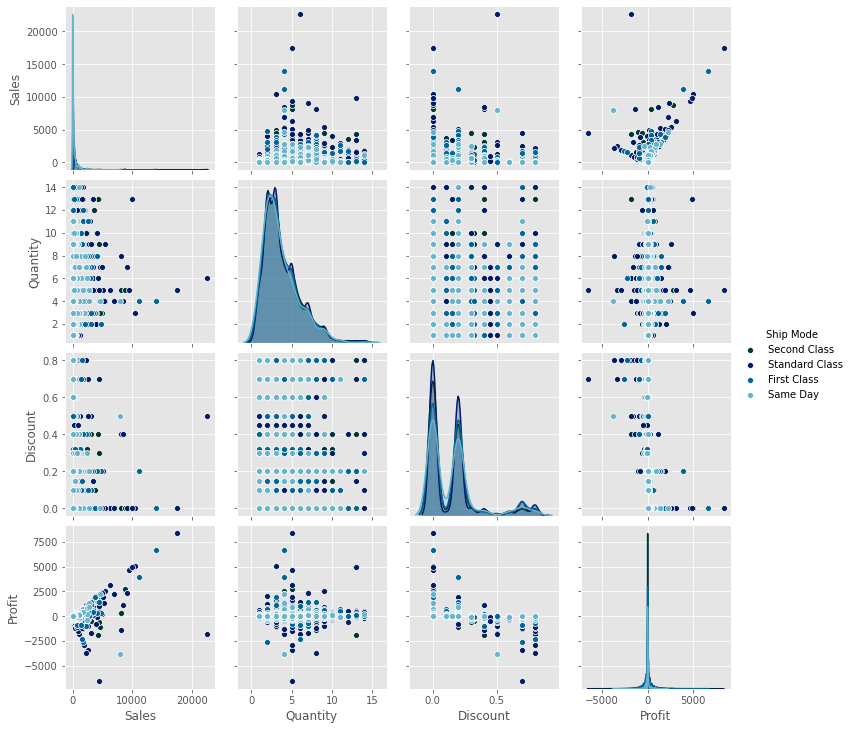

In [174]:
sns.pairplot(df, hue = 'Ship Mode', palette = 'ocean')

In [175]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [176]:
df_second = df[df["Ship Mode"] == "Second Class"]
df_standard = df[df["Ship Mode"] == "Standard Class"]
df_first = df[df["Ship Mode"] == "First Class"]
df_same = df[df["Ship Mode"] == "Same Day"]

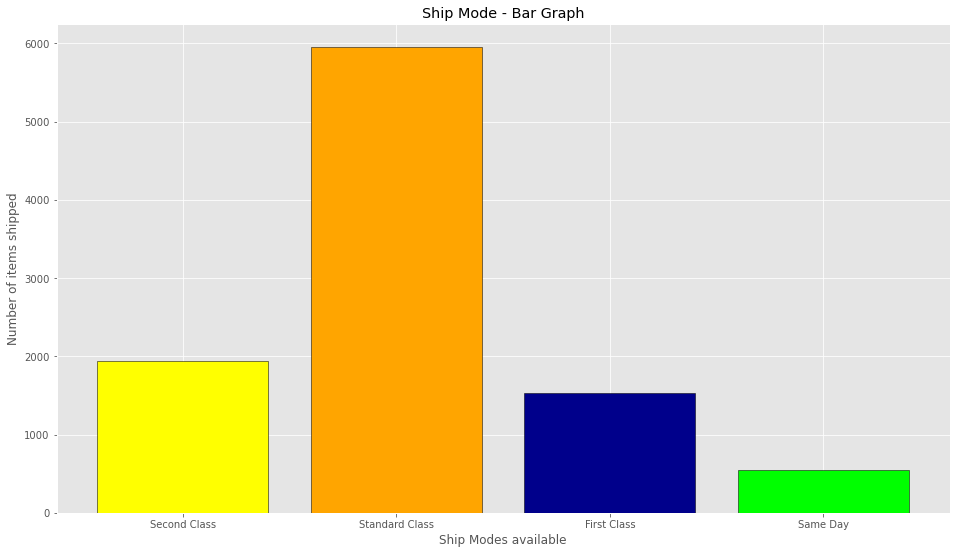

In [177]:
x = ["Second Class", "Standard Class", "First Class", "Same Day"]
y = [len(df_second.index), len(df_standard.index), len(df_first.index), len(df_same.index)]
plt.bar(x, y, color = ["yellow", "orange", "darkblue", "lime"], edgecolor = "black")
plt.title("Ship Mode - Bar Graph")
plt.xlabel("Ship Modes available")
plt.ylabel("Number of items shipped")
plt.grid(True)
plt.show()

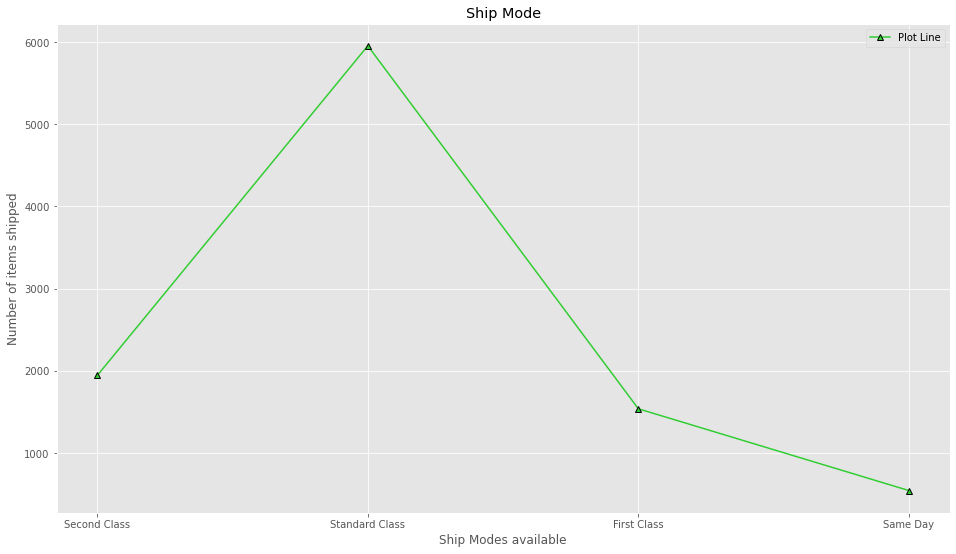

In [178]:
plt.plot(x, y, label = "Plot Line", color = "limegreen", markeredgecolor = "black", marker = "^")
plt.title("Ship Mode")
plt.xlabel("Ship Modes available")
plt.ylabel("Number of items shipped")
plt.legend()
plt.grid(True)
plt.show()

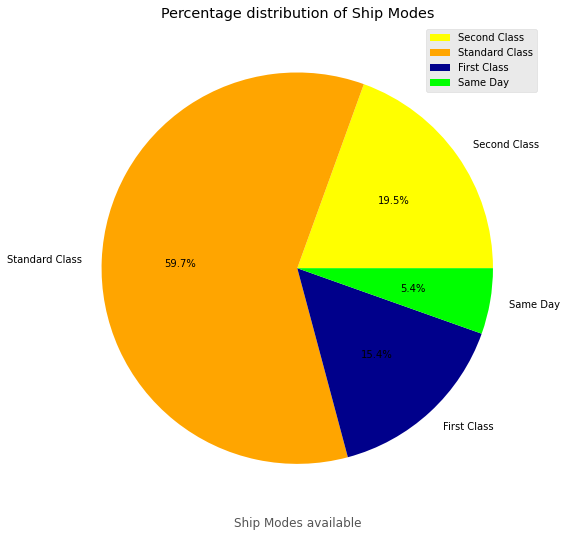

In [179]:
plt.pie(y, labels = x, colors = ["yellow", "orange", "darkblue", "lime"],autopct="%1.1f%%")
plt.title("Percentage distribution of Ship Modes")
plt.xlabel("Ship Modes available")
plt.legend()
plt.grid(True)
plt.show()

In [206]:
# valuecounts for region
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

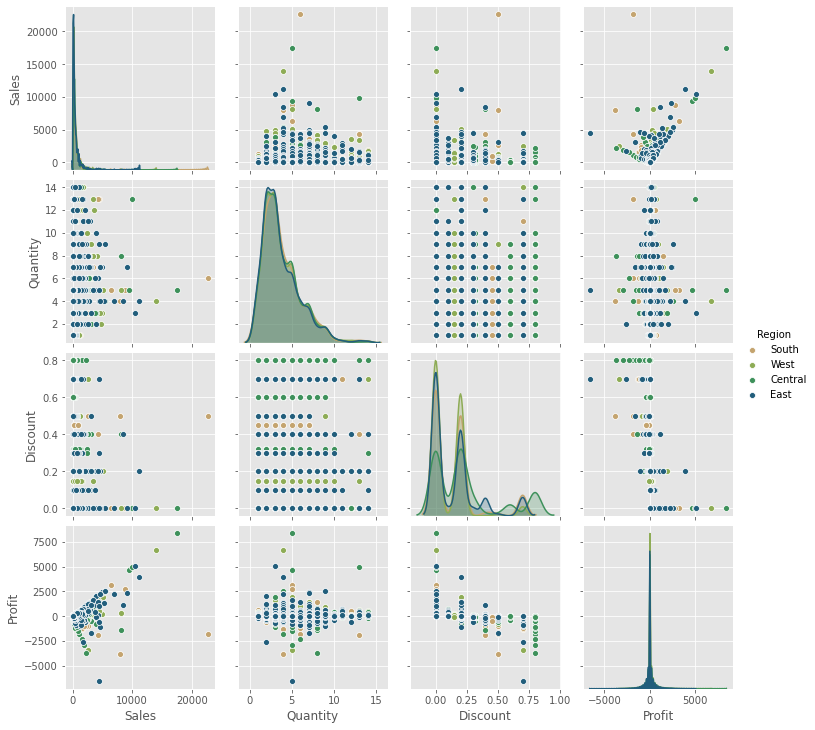

In [209]:
sns.pairplot(df, hue = 'Region', palette = 'gist_earth_r')

In [210]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [211]:
df_south = df[df["Region"] == "South"]
df_west = df[df["Region"] == "West"]
df_central = df[df["Region"] == "Central"]
df_east = df[df["Region"] == "East"]

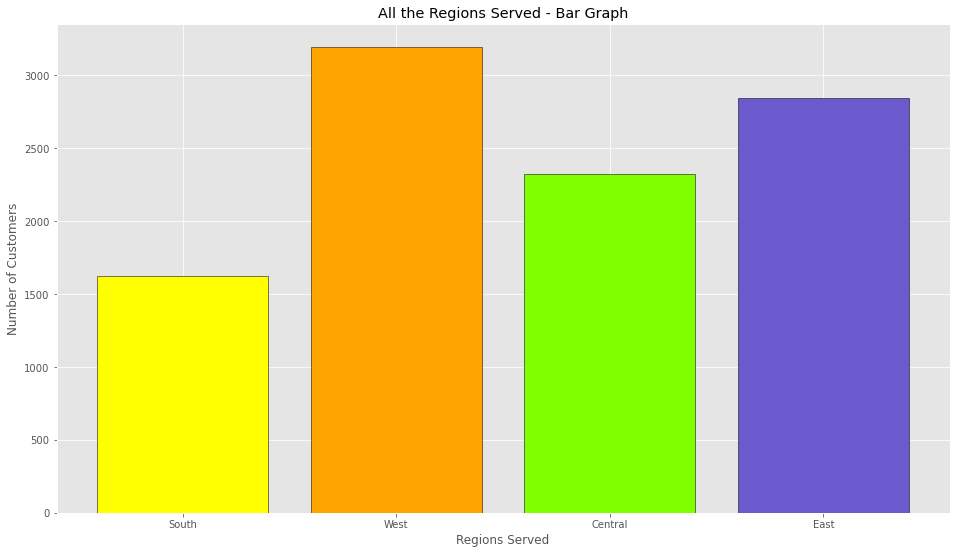

In [225]:
x = ["South", "West", "Central", "East"]
y = [len(df_south.index), len(df_west.index), len(df_central.index), len(df_east.index),]
plt.bar(x, y, color = ["yellow", "orange", "chartreuse", "slateblue"], edgecolor = "black")
plt.title("All the Regions Served - Bar Graph")
plt.xlabel("Regions Served")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

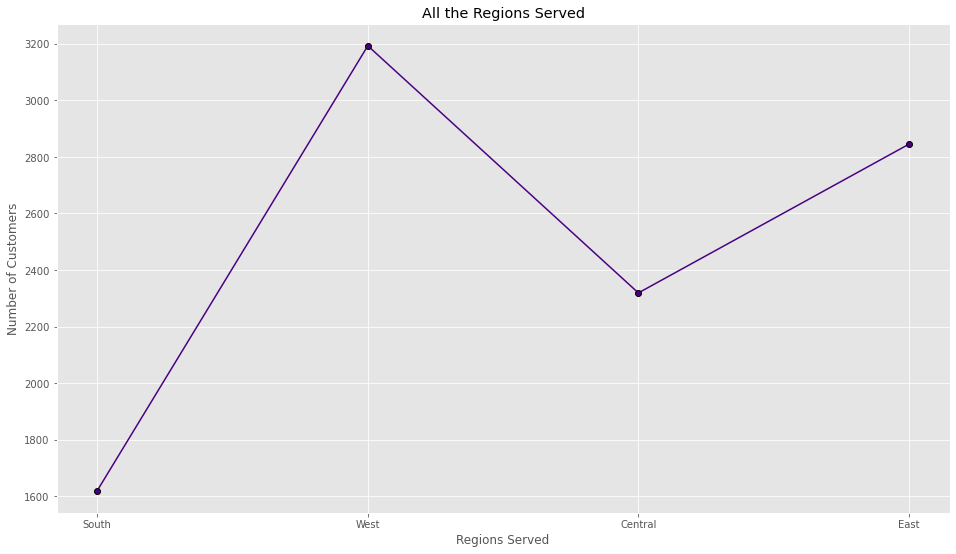

In [227]:
plt.plot(x, y, label = "Plot Line", color = "indigo", markeredgecolor = "black", marker = "o")
plt.title("All the Regions Served")
plt.xlabel("Regions Served")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

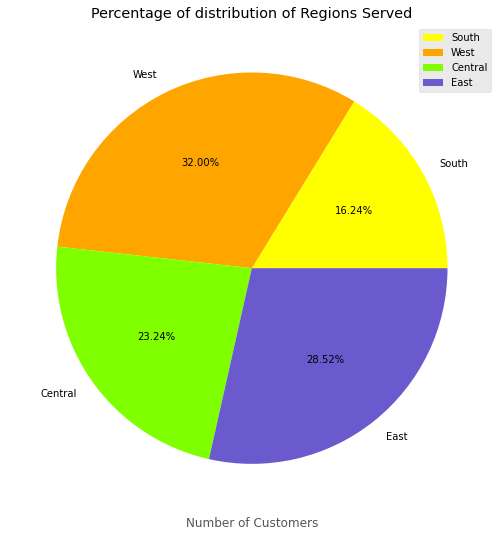

In [228]:
plt.pie(y, labels = x, colors = ["yellow", "orange", "chartreuse", "slateblue"], autopct="%1.2f%%")
plt.title("Percentage of distribution of Regions Served")
plt.xlabel("Number of Customers")
plt.legend()
plt.grid(True)
plt.show()

In [229]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

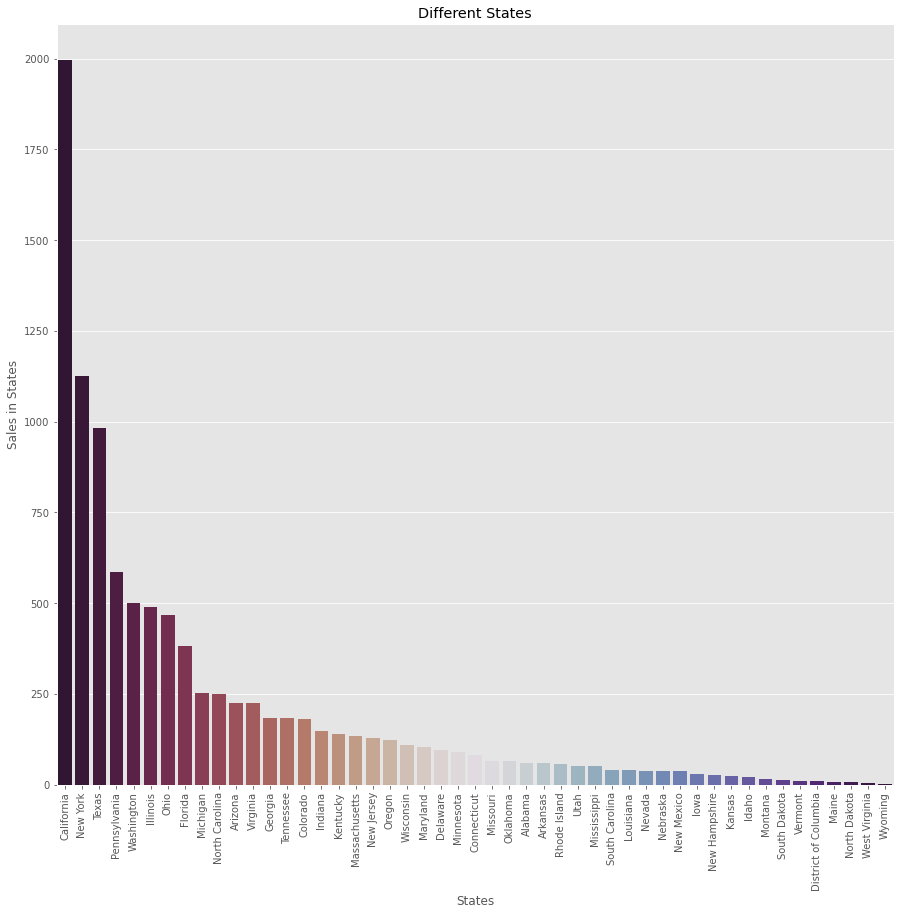

In [230]:
plt.figure(figsize=(15,14))
sns.countplot(x='State', data=df, palette='twilight_shifted_r', order=df['State'].value_counts().index)
plt.title("Different States")
plt.xlabel("States")
plt.ylabel("Sales in States")
plt.xticks(rotation=90)
plt.show()

In [231]:
mode_profit = df.groupby("Ship Mode")["Profit"].sum()
segment_profit = df.groupby("Segment")["Profit"].sum()
region_profit = df.groupby("Region")["Profit"].sum()
category_profit = df.groupby("Category")["Profit"].sum()

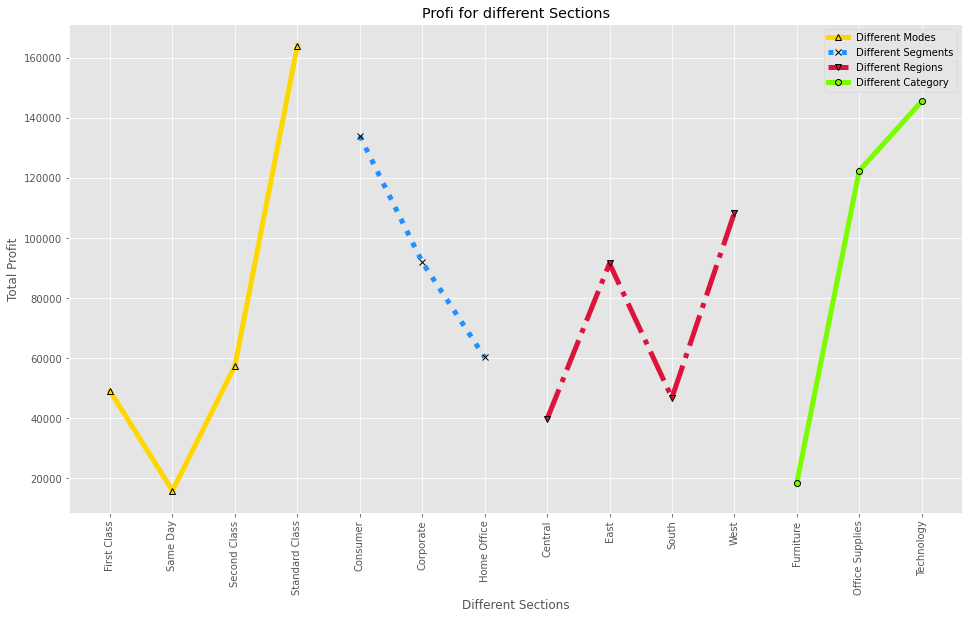

In [251]:
plt.plot(mode_profit, color="gold", lw=5, ls="-", marker="^", label="Different Modes", markeredgecolor="black")
plt.plot(segment_profit, color="dodgerblue", lw=5, ls=":", marker="x", label="Different Segments", markeredgecolor="black")
plt.plot(region_profit, color="crimson", lw=5, ls="-.", marker="v", label="Different Regions", markeredgecolor="black")
plt.plot(category_profit, color="lawngreen", lw=5, marker="o", label="Different Category", markeredgecolor="black")
plt.title("Profi for different Sections")
plt.xticks(rotation=90)
plt.xlabel("Different Sections")
plt.ylabel("Total Profit")
plt.legend()
plt.grid(True)
plt.show()

In [233]:
df["Sub-Category"].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

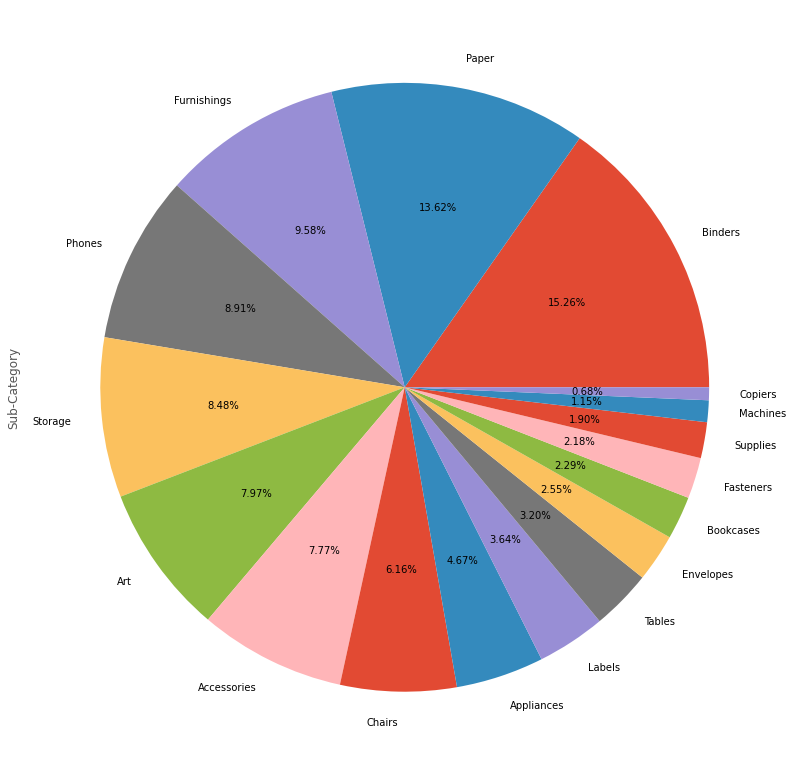

In [234]:
plt.figure(figsize=(15,14))
df["Sub-Category"].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()

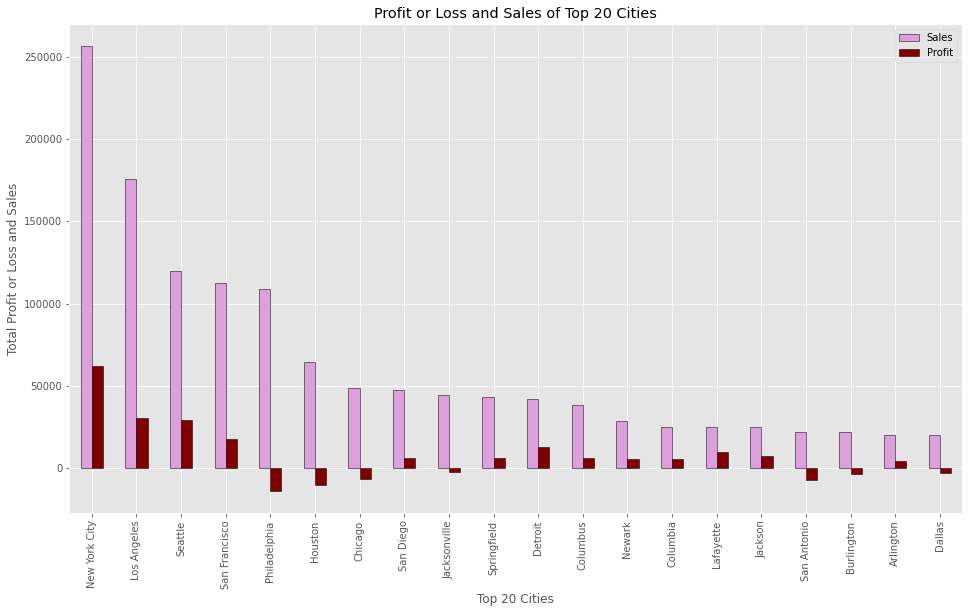

In [236]:
city_sal_pro = df.groupby("City")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).head(20)
city_sal_pro.plot(kind="bar", color=["plum", "maroon"], edgecolor="black")
plt.title("Profit or Loss and Sales of Top 20 Cities")
plt.xlabel("Top 20 Cities")
plt.ylabel("Total Profit or Loss and Sales")
plt.grid(True)
plt.show()

In [237]:
t_states = df['State'].value_counts().nlargest(10)
t_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

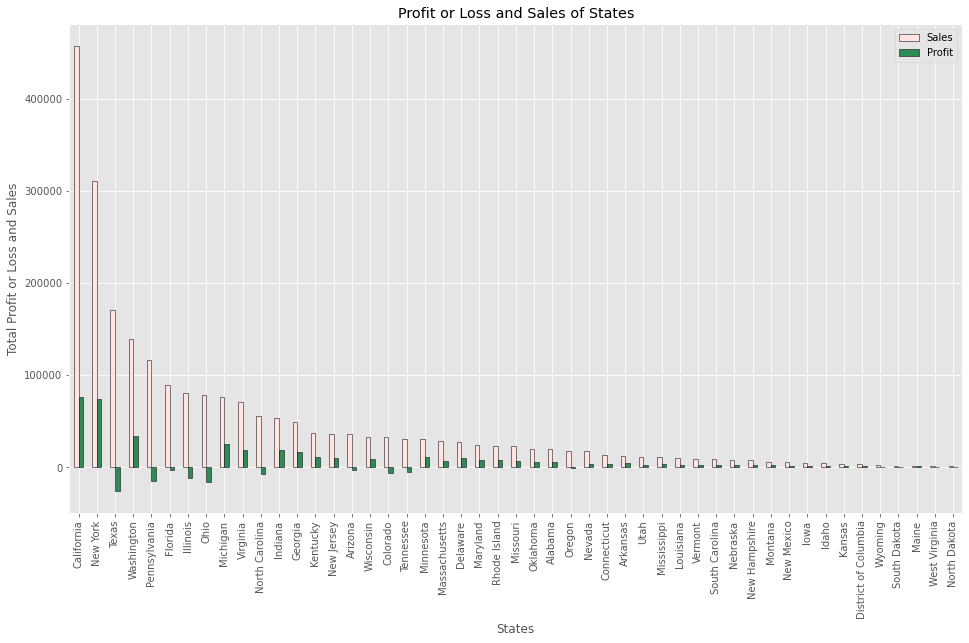

In [235]:
state_sal_pro = df.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False)
state_sal_pro.plot(kind="bar", color=["mistyrose", "seagreen"], edgecolor="black")
plt.title("Profit or Loss and Sales of States")
plt.xlabel("States")
plt.ylabel("Total Profit or Loss and Sales")
plt.grid(True)
plt.show()

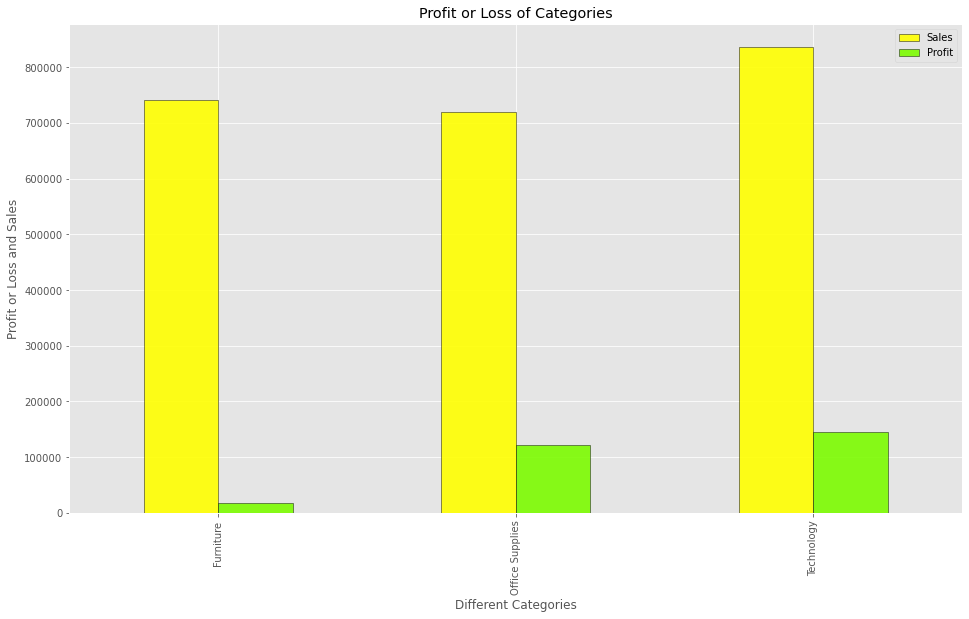

In [241]:
df.groupby("Category")[["Sales","Profit"]].sum().plot.bar(color=["yellow","lawngreen"],alpha=0.9,edgecolor="black")
plt.title("Profit or Loss of Categories")
plt.xlabel("Different Categories")
plt.ylabel("Profit or Loss and Sales")
plt.show()

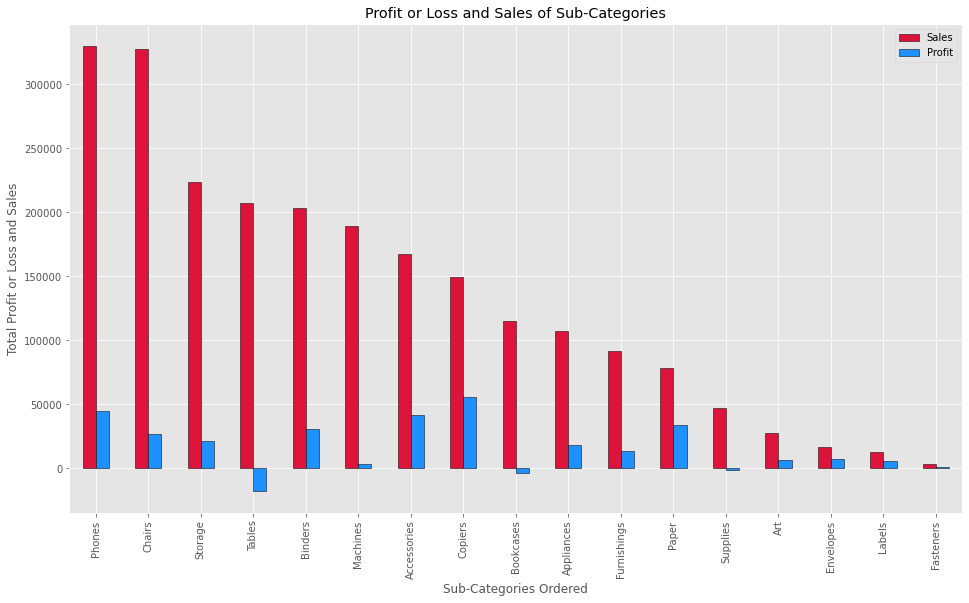

In [242]:
subcat_sal_pro = df.groupby("Sub-Category")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False)
subcat_sal_pro.plot(kind="bar", color=["crimson", "dodgerblue"], edgecolor="black")
plt.title("Profit or Loss and Sales of Sub-Categories")
plt.xlabel("Sub-Categories Ordered")
plt.ylabel("Total Profit or Loss and Sales")
plt.grid(True)
plt.show()

Text(0, 0.5, 'Profit')

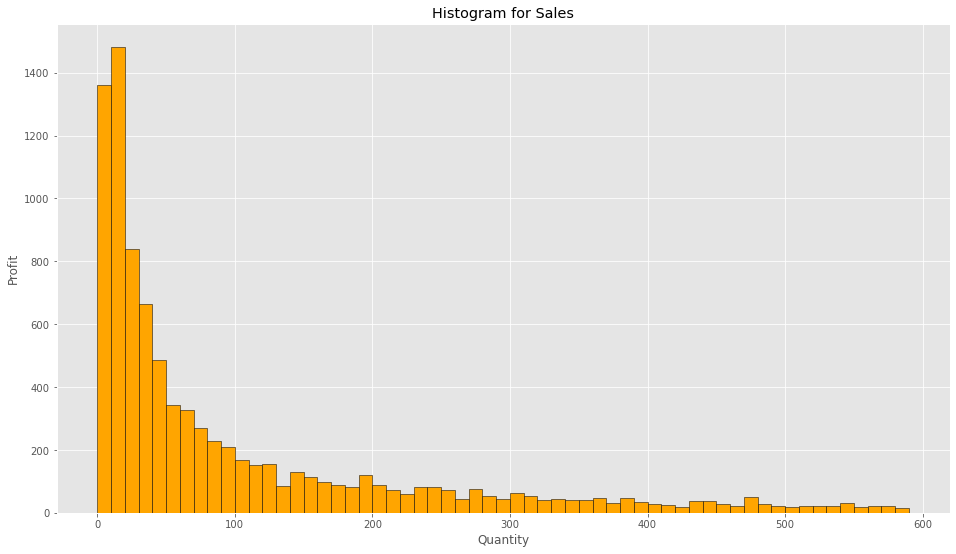

In [245]:
plt.hist(df["Sales"],bins=(np.arange(0,600,10)),color="orange",edgecolor="black")
plt.title("Histogram for Sales")
plt.xlabel("Quantity")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

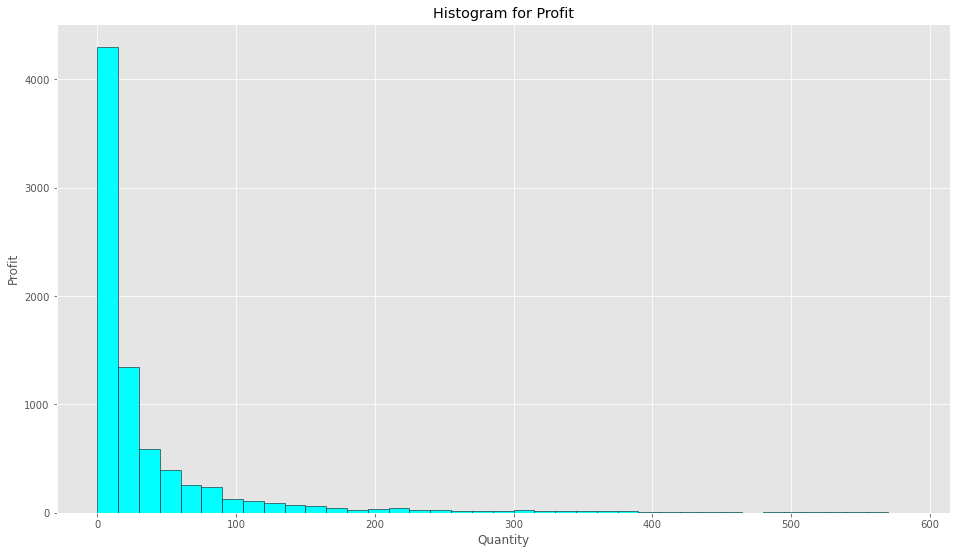

In [244]:
plt.hist(df["Profit"],bins=(np.arange(0,600,15)),color="cyan",edgecolor="black")
plt.title("Histogram for Profit")
plt.xlabel("Quantity")
plt.ylabel("Profit")

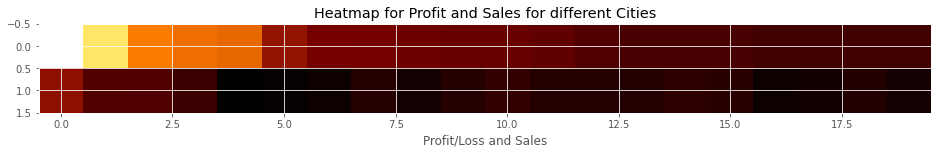

In [249]:
plt.imshow(city_sal_pro.transpose(), cmap='afmhot', interpolation='nearest')
plt.title("Heatmap for Profit and Sales for different Cities")
plt.xlabel("Profit/Loss and Sales")
plt.show()

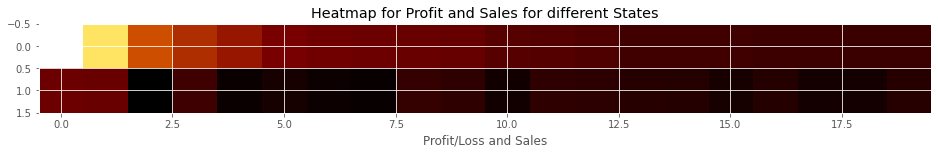

In [250]:
plt.imshow(state_sal_pro.head(20).transpose(), cmap='afmhot', interpolation='nearest')
plt.title("Heatmap for Profit and Sales for different States")
plt.xlabel("Profit/Loss and Sales")
plt.show()

# <font color='Red' face='Times New Roman'><u>Insights Derived:</u></font>

1. Discount has no effect on Quantity sold.
2. Profit and Sales are maximum in consumer segment and minimum in home office segment.
3. Improvement needed in Same Day Shipment Mode.
4. Improvements needed in Southern Region.
5. Highest number of buyers are from California and New York.
6. Maximum Profits are from binders, papers, furnishings, phones, storage, art, accessories and minimum from supplies, machines, copiers(very less).
7. Loss in Texas, pennsylvania and Ohio.
8. Technology and Office Supplies have high profit whereas Furniture has less profit.
9. Phone sub-categories have high sales, Chairs have high sale but less profit, whereas, Tables and Bookcases sub-categories are facing huge losses.
10. Profit and Sales are not related.